# CONVOLUTIONAL NEURAL NETWORK(CNN)

Convolutional Neural Networks(CNN) is a deep learning model used in computer vision applications. CNN is also known as covnets.The process of convolution measures the impact of one signal when it is integrated with another signal.One of the main application of convolution is to find the patterns in signals.One example of convolution application could be an averaging filter which is commonly used in image processing.

Let us consider training an image recognition system to identify an object.The input images are of size 32x32x3 which means they have 3 channels of width 32 and height 32. To fed the input of such large size to multi-layer Neural Network would be challenging and computationally expensive.The parameter explosion resulting from such a large image features would also result in overfitting.CNN are specifically designed to overcome this problem where the inputs are arranged in the grid like shape as found in images.CNN have layered structured in which volume of one layer is connected to relevant region of the next layer and therefore any parameter explosion is prevented.





# CNN Layers

CNN consists of series of layers which performs transformation on an input image array. In this section we are going to look at some important layers that are use to build a CNN.

## Convolution Layer

To understand the process of convolution,we start with an image as our input.The images are the arrangement of pixels in some given order.The images can have multiple pixel layers which are called channels.The images uses decimal values from 0 to 255. RGB images uses different channel for red, green and blue colors which are known as primary color. The proper mixture of these colors gives other different colors. 

Convolution process works on some fixed image size through out all the channels at the same time. The convolution carries out transformation process over  the image which is also known as filtering.The output generated after applying the filter is known as feature map.  A convolutional window  has some fixed size which is moved over an image with a certain amount known as stride. A stride of 1 means the window is moving 1 pixel towards the right or bottom, a stride of 2 means , moving with 2 pixel.

Each movement of convolutional window over the image with given stride results filtering operation with a kernel of same size. Kernal is small matrix used for blurring,sharpening,embossing,edge detection ,etc.The kernel is chosen based on the question statement.This kernal moves through out the image , then you have the filtered image.

Convolution learns a image patterns and can retrace them in any other part of the image.The more stacked convolution helps the network to learn more complex and useful patterns for image recognition. If a  first convolutional layer  can grasp the pattern of a dog,the second layer can recreate more chatacteristic dog features that provides sufficient data for the neural network in recognizing the dogs.



![figure_1.png](images/figure_1.png)

The figure 1.1 above shows a kernel of size 2x2(filtering window of 2x2) convoluted with an image of 2 dimensions. A stride of 1 causes the convolution window to move one pixel left/ bottoms to get the sum of products as an output. 
Padding in convolution refers to the process of adding an amount of pixels of zero value around the border of image. Padding extends the area of an image in which a CNN process.In example above , we can see that the input pixel at the border($a,d,i,l$) are only used once whereas other pixels are used more than once.Beacuse of this the information at the border is not preserved so well and therefore padding is an excellent solution to prevent such data leakage. An input image with padding=1 is shown in the figure below.

![figure_2.png](images/figure_2.png)

The choice of kernel size , stride, and zero padding affects the size of the output/feature map. Let us consider some parameters below:
- $  W_{in} \ \text { is width of an input , For eg 32x8 image pixel size $W_{in}=8$}  $
- $  H_{in} \ \text { is height of  an input , For eg 32x8 image pixel size $H_{in}=32$}  $
- $  D_{in} \ \text { is depth/channel of an input , For eg gray scale image as D_{in}=1 , non-gray } D_{in}=3 $
- $  p \ \text{is equal zero padding along both axes}  $
- $  k \ \text{is square kernel size} $
- $  s \ \text {is same stride along both axes} $
- $  o \ \text{is the size of an output}   $

The size of an output feature map $H_{out} \times W_{out}  $ is given as 
$$ W_{out}= \frac{W_{in}+2p-k}{s}+1   , H_{out}= \frac{H_{in}+2p-k}{s}+1   $$

In addition to above parameter definition, we have an extra parameter known as number of kernel filters. This indicates how many kernel filters we are going to use for the CNN to learn. The output depth/channels of feature map is always equal to the number of kernel filters used in the convolution process.A bias is added to the each of those kernel filters.

As an example consider an input image of size $10 \times 10 \times 3$  where $ W_{in}=10 ,   H_{in}=10  ,D_{in}=3  $ and , $s=1, p=0,k=3$. The number of kernel filters used for a convolution layer is $filters =5 $. The $ H_{out} =8 ,  W_{out}=8   $ which is calculated using equation(1).The $D_{out}=5$ which is equal to the number of kernel filters used in this layer. Thus the output size is $(8 \times 8 \times 5)$. This means we have 5 output matrixes each with size of $(8 \times 8 )$.

Let us calculate total number of parameters for this convolution layer.
 - parameters in one kernel filter of size (3,3)= 9. Each Filter will convolve with three different channels of image.
   Parameters in one filter = $D_{in} \times \text{parameters in one filter}  $ = $9  \times 3$=27
   
 - Each filtered output has one bias added $\text bias=1 $. Therefore  Parameters in one filter = 27 +1 =28
 
 - We have five such kernel filters, therefore total parameters = $28 \times 5$=140

Thus $\text {total number of parameters} = \text{ number of kernel filters} \times (\text { number of elements in kernel matrix} \times {D_{in}}+ bias) $

## Pooling / Subsampling Layer 

As we keep on adding convolution layer to get the most out of the data, the depth of the output layer increases too which results in the increasing of number of parameters. The increase in network dimensionality will increase the time and space complexity.This is when a pooling/Subsampling layer comes in action. A pooling layer immediately follows after a convolutional layer. The pooling layer downsample the output of a convolution layer along the dimensions.The pooling layer reduces the number of learning parametes thus reducing  the overfitting situation and increases the overall performance and accuracy of the network.One of the most common pooling technique that is in use  is known as Max Pooling.
Similar to convolutional's kernel, max pooling kernels are windows of a certain size and strides value that slide over the image.However these max pool kernel doesnot have any kernel value and selects the max pixel value within the window for the next layer.
In Average pooling, a feature map for each pooled aread is replaced by a single value which is the average of the values inside the pooled area.


Let us consider an output image obtained by using a convolution layer example in the above section. The feature map of size $8\times 8 \times 5 $ is now fed to a Max pooling layer with stride $s_{p}=2$ and kernel size $k_{p}=2$. The output size of the pooling layer for the input $H_{out} \times W_{out} \times D_{out}$ is  defined as 

$$ (\frac {H_{out}-k_{p}} {s} +1)  \times (\frac {W_{out}-k_{p}} {s} +1) \times D_{out}=3 \times 3 \times 5 $$ 

The number of channels doesnot change because the pooling is applied to each of the channels independently.There are no  parameters to learn in max pooling.

## Batch Normalization Layer

Every CNN layer has certain parameters or weight that gets trained over some period with a training dataset.However the choice of initial weight for newtwork initialization plays a crucial role on the speed of convergenve of network training. Batch Normalization aims to be robust to problems of poor network initialization. 
Normalization is a method to make different samples seen by a machine learning model more similar to each other. This helps model learn and generalize well to new data. The common way to generalize normalize the data is to centering the data on zero by subtracting the mean from the data and giving the data Standard Deviation of 1 by dividing the data by its standard deviation. 

## Drop Out Layer

Dropout is one of the most effective and most commonly used regularizatiion techniques for neural networks.Dropout layer randomly sets some of the output of neurons to zeros. For example, Consider a vector consisting as an output of neurons [0.1, 2.4 , 0.5 ,0.3,0.6 ] which when applied to drop out layer may set this vector to  [0.1, 2.4 , 0 ,0.3,0]. The dropout rate is the fraction of output that are set to zero and are usually set between 0.2 and 0.5.
Adding a dropout rate to particular layer turns off the neuron at that layer. 

## Fully Connected(FC) Layer

The final layer of CNN is known as full connected layer or the dense layer.Fully Connected layer can be implemented using feed forward neural network(Multi Layer Perceptron(MLP)) as shown in chapter-1 (figure 1.3). Neurons in this layer are fully connected to all the activations in the previous layer. The output of this layer is usually the class score where the number of neurons(at the output layer) equals the number of classes.
Each Layer works in the different ways and the parameters in these layers are learned through a gradient descent based algorithm using back propagation(see chapter-1).MLP works greats in classification problem.


# Loss Functions in CNN

CNN uses gradient descent based algorithm to minimize the cost function.Since the CNN is more of classification problem, cross-entropy loss is more used with CNN. The underlying math for cross-entropy and logistic loss(see the beginner module) is same. The only difference is that logistic loss is used when there two possible classes where as cross entropy is used for more than two classes.
Cross entropy is a measure of the difference between two probability distribution.Binary cross cnrtopy is used when there are two possible outcomes and one needs to be selected.

# Fashion Mnist Dataset

In this example , we are going to import the dataset from fashion_mnist . We will be training our model to train some fashion products such as t-shirt, shoes,pull over . There are 10 different products. Our model is going to learn to identify these products using CNN. To keep things simple , we will be using same framework that we had used in deep learning chapter. Always remember that it doesnot matter what framework you use or how good you are in programming , it is always important to learn the concept!Do not focus so much on optimizing the code  . 

* 2d convolutional layer with:
    * one input channel
    * 6 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* 2d convolutional layer with:
    * 16 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* 2d convolutional layer with:
    * 16 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* 2d convolutional layer with:
    * 16 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* A fully-connected layer with:
    * 128 outputs
    * followed by ReLU
* A fully-connected layer with 10 outputs and with softmax activation function.

In [4]:
from numpy.random import seed 
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow import keras
import matplotlib.pyplot as plt 
from keras.datasets  import mnist
from sklearn.model_selection import train_test_split
import numpy as np


In [5]:
(X, y),(x_val, y_val) = datasets.fashion_mnist.load_data()

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
print(f'The shape of x_train is :{x_train.shape}') ## train data
print(f'The shape of x_valid is :{x_val.shape}') ## validation data 
print(f'The shape of y_train is :{y_train.shape}') ##  validation labels 
print(f'The shape of y_valid is :{y_val.shape}')## test labels 
print(f'The shape of x_test is :{x_test.shape}') ##  validation labels 
print(f'The shape of y_test is :{y_test.shape}')## test labels 

The shape of x_train is :(48000, 28, 28)
The shape of x_valid is :(10000, 28, 28)
The shape of y_train is :(48000,)
The shape of y_valid is :(10000,)
The shape of x_test is :(12000, 28, 28)
The shape of y_test is :(12000,)


In [8]:
len_of_class = len(np.unique(y_train))
print(len_of_class)

10


In [9]:
# In reality these class names are label encoded with some numercial values from 0 to  9(try print(y_tain)or print(y_test))
#  so for ease i have used human understable terms 
# such  as t-shirt, shirt etc.
# BUT remember to use numerical values  for labels, text doesnot work for learning !!!!!!

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

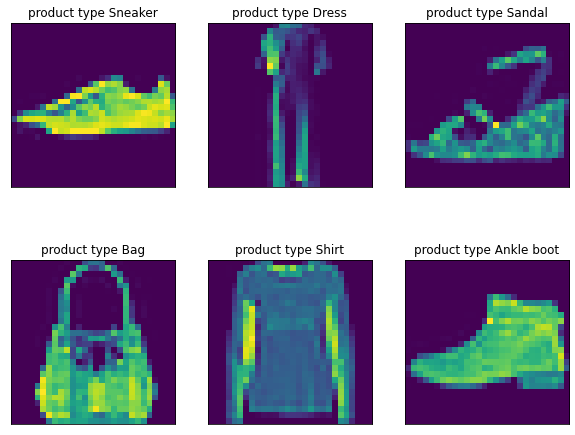

In [10]:
fig,axs=plt.subplots(2,3,figsize=(10,8),facecolor='w',edgecolor='k')
for image,label, ax in zip(x_train,y_train,axs.ravel()):
    ax.imshow(image)
    ax.set_title(f'product type {class_names[label]}')
    ax.set_xticks([])
    ax.set_yticks([])

In [11]:
model = Sequential([
                   layers.Rescaling(1./255, input_shape=(28,28,1)),
                   layers.Conv2D(32,3, padding='same',activation='relu'),
                   layers.Conv2D(32,3, padding='same',activation='relu'),
                   layers.MaxPooling2D(pool_size=(2,2)),
                   layers.Conv2D(64,3,padding='same',activation='relu'),
                   layers.Conv2D(64,3,padding='same',activation='relu'),
                   layers.MaxPooling2D(pool_size=(2,2)),
                   layers.Flatten(), # always flatten before you feed to forward Neural Network 
                   layers.Dense(128,activation='relu'),
                   layers.Dense(len_of_class,activation='softmax') # last layer should consists of number of neurons=number of classes
                   ])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
epochs=20
history = model.fit(
  x=x_train,
  y=y_train,
  validation_data=(x_val,y_val),
  epochs=epochs,
  batch_size=32
)

Epoch 1/20
1500/1500 [==============================] - 98s 65ms/step - loss: 0.3980 - accuracy: 0.8544 - val_loss: 0.3066 - val_accuracy: 0.8855
Epoch 2/20
1500/1500 [==============================] - 105s 70ms/step - loss: 0.2477 - accuracy: 0.9088 - val_loss: 0.2545 - val_accuracy: 0.9069
Epoch 3/20
1500/1500 [==============================] - 118s 78ms/step - loss: 0.1988 - accuracy: 0.9261 - val_loss: 0.2418 - val_accuracy: 0.9110
Epoch 4/20
1500/1500 [==============================] - 126s 84ms/step - loss: 0.1666 - accuracy: 0.9375 - val_loss: 0.2196 - val_accuracy: 0.9200
Epoch 5/20
1500/1500 [==============================] - 117s 78ms/step - loss: 0.1362 - accuracy: 0.9489 - val_loss: 0.2287 - val_accuracy: 0.9181
Epoch 6/20
1500/1500 [==============================] - 134s 89ms/step - loss: 0.1120 - accuracy: 0.9583 - val_loss: 0.2249 - val_accuracy: 0.9237
Epoch 7/20
1500/1500 [==============================] - 132s 88ms/step - loss: 0.0868 - accuracy: 0.9679 - val_loss: 0.

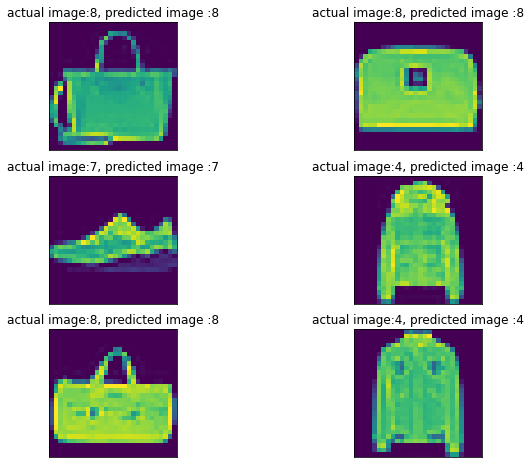

In [40]:
# Test our model with the test data set x_test,y_test
fig,axs=plt.subplots(3,2,figsize=(10,8))
for image_test,label_test, ax in zip(x_test,y_test,axs.ravel()):
    y_pred=np.argmax(model.predict(image_test.reshape(1,28,28,1))) # returns the position for given maximum probability 
                                                              # reshape TO 4 DIMESNSIONS 
                                                              # array of 1 row and N columns.
                                                              # use model.predict to get predicted labels value for given test image
    
    ax.imshow(image_test)
    ax.set_title(f'actual image:{label_test}, predicted image :{y_pred}')
    ax.set_xticks([])
    ax.set_yticks([])


# Exercise For Students

In [15]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

Solar flares are the electromagnetic explosions occuring in magnetically active regions on the solarsurface. In this exercise we are going to make a flare prediction which is consider as a classification problem looking for a binary decision whether the sun is producing the flare from the solar images. We are going to import the dataset for two different classes of images: flare and no flares which is located in ~/solar_flares directory. 

In [25]:
# given keras utilites classifies the classes based on the number of directories we have inside solar_flares.
# Refer https://keras.io/api/data_loading/image/#imagedatasetfromdirectory-function
train_ds = tf.keras.utils.image_dataset_from_directory('solar_flares',validation_split=0.2,subset='training',seed=123,image_size=(128,128),batch_size=1)
valid_ds=tf.keras.utils.image_dataset_from_directory('solar_flares',validation_split=0.2,subset='validation',seed=123,image_size=(128,128),batch_size=1)

Found 1074 files belonging to 2 classes.
Using 860 files for training.
Found 1074 files belonging to 2 classes.
Using 214 files for validation.


In [12]:
len_of_class=len(train_ds.class_names)
len_of_class

2

* 2d convolutional layer with:
    * one input channel
    * 16 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* 2d convolutional layer with:
    * 32 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* 2d convolutional layer with:
    * 64 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* 2d convolutional layer with:
    * 63 output channels
    * kernel size 3 (no padding)
    * followed by ReLU
* Max-pooling layer with kernel size 2 and stride 2
* A fully-connected layer with:
    * 128 outputs
    * followed by ReLU
* A fully-connected layer with  2 outputs 

In [28]:
## TO DO 
## CREATE A MODEL WITH GIVEN SPECIFICATION
## YOUR MODEL HERE
model = Sequential([
                   layers.Rescaling(1./255, input_shape=(128,128,3)),
                   layers.Conv2D(16,3, padding='same',activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(32,3,padding='same',activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(64,3,padding='same',activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Conv2D(64,3,padding='same',activation='relu'),
                   layers.MaxPooling2D(),
                   layers.Flatten(),
                   layers.Dense(128,activation='relu'),
                   layers.Dense(len_of_class)
                   
                   
                   
                   ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)       

In [30]:
## TO DO 
## COMPILE YOUR MODEL HERE 
## use optimizer 'adam' , loss as 'tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)' and metrics as accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
epochs=20
## TO DO 
## TRAIN YOUR MODEL HERE 
epochs=20
history = model.fit(
  train_ds,
  validation_data=valid_ds,
  epochs=epochs
)

Epoch 1/20
860/860 [==============================] - 13s 12ms/step - loss: 0.7011 - accuracy: 0.5221 - val_loss: 0.7019 - val_accuracy: 0.4486
Epoch 2/20
860/860 [==============================] - 14s 16ms/step - loss: 0.6922 - accuracy: 0.5372 - val_loss: 0.7000 - val_accuracy: 0.4486
Epoch 3/20
860/860 [==============================] - 14s 16ms/step - loss: 0.6961 - accuracy: 0.5105 - val_loss: 0.6951 - val_accuracy: 0.4720
Epoch 4/20
860/860 [==============================] - 14s 16ms/step - loss: 0.6795 - accuracy: 0.5512 - val_loss: 0.6866 - val_accuracy: 0.4813
Epoch 5/20
860/860 [==============================] - 14s 16ms/step - loss: 0.7001 - accuracy: 0.5349 - val_loss: 0.7024 - val_accuracy: 0.4486
Epoch 6/20
860/860 [==============================] - 12s 14ms/step - loss: 0.6923 - accuracy: 0.5349 - val_loss: 0.7004 - val_accuracy: 0.4486
Epoch 7/20
860/860 [==============================] - 15s 17ms/step - loss: 0.6911 - accuracy: 0.5349 - val_loss: 0.7003 - val_accuracy: